# Data Cleaning

It seems there are quite a number of 'intended' challenges putting in the dataset file. 😂  
Pandas read_csv doesn't work

In [822]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [823]:
filename = 'data/dataset.csv'

rows = []
firsts = []
ncols = []

# with this setting, the problems of 'newline' character embeded in address column' are handled
with open(filename,'r',newline='') as file:
    reader = csv.reader(file, quotechar='"', delimiter=',',doublequote=True)#quoting=csv.QUOTE_ALL)
    for row in reader:
        rows.append(row)
        firsts.append(row[0]) # for quick check of ids
        ncols.append(len(row)) # check number parsed columns
        
temp = pd.DataFrame({'first': firsts, 'row': rows, 'ncol' : ncols})
print(temp.shape)
temp.head()

(316827, 3)


,first,row,ncol
0,id,"[id, loan_amnt, term, int_rate, installment, g...",27
1,1,"[1, 10000, 60 months, 18.55, 256.94, E, E2, S...",27
2,2,"[2, 12250, 36 months, 11.55, 404.25, B, B3, c...",27
3,3,"[3, 4200, 36 months, 17.77, 151.36, D, D1, MV...",27
4,4,"[4, 6000, 36 months, 15.22, 208.64, C, C3, Co...",27


In [824]:
# find rows with issues
temp[temp.ncol != 27]

,first,row,ncol
271,356,"[356, 20000, 36 months, 14.33, 686.77, C, C1,...",9
34791,97478,"[97478, 21500, 60 months, 18.25, 548.89, D, D...",32
78154,West Katiefort,"[West Katiefort, SD 93700""]",2


And this row's address seems to be trampled. Just before 78154

In [825]:
temp.iloc[78153].row

['54313',
 '9000',
 ' 36 months',
 '7.49',
 '279.92',
 'A',
 'A4',
 'friendship center golf cars',
 '4 years',
 'RENT',
 '40000.0',
 'Not Verified',
 'Fully Paid',
 'debt_consolidation',
 'personal loan',
 '22.41',
 'Apr-2000',
 '15',
 '0',
 '13414',
 '21.9',
 '29',
 'f',
 'INDIVIDUAL',
 '',
 '0.0',
 '49842 Deanna Street Apt. 820\r\nNorth Deborah, Mn,Debt consolidation,37.1,Sep-2004,24,0,5293,8.4,53,w,INDIVIDUAL,4.0,0.0,49778 Nancy Lake Apt. 783']

In [826]:
col_names = temp.iloc[0,1]
exclude_rec_no = [0, 271, 34791, 78153, 78154]
df = pd.DataFrame(temp.loc[~temp.index.isin(exclude_rec_no), 'row'].tolist(), columns=col_names)
df.shape

(316822, 27)

In [827]:
df.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,1,10000,60 months,18.55,256.94,E,E2,Sr. Director OF Marketing & Business Dev,5 years,MORTGAGE,...,16,0,151198,92.4,31,f,INDIVIDUAL,3.0,0.0,"257 Smith Circles Apt. 186\r\nWilsonland, NH 1..."
1,2,12250,36 months,11.55,404.25,B,B3,clearwater towing,2 years,OWN,...,8,0,16125,79.4,16,f,INDIVIDUAL,0.0,0.0,"632 Villanueva View\r\nLawrencechester, NM 00813"
2,3,4200,36 months,17.77,151.36,D,D1,MV Transportation,4 years,RENT,...,6,0,9525,73.8,7,f,INDIVIDUAL,0.0,0.0,"612 Gillespie Island\r\nDavisside, KY 93700"
3,4,6000,36 months,15.22,208.64,C,C3,County of Santa Clara,10+ years,RENT,...,9,0,12832,82.8,16,w,INDIVIDUAL,0.0,0.0,"781 Jessica Trail\r\nRyanton, FL 05113"
4,5,16200,36 months,10.16,523.95,B,B1,Memorial Hermann,< 1 year,MORTGAGE,...,8,0,27084,71.7,24,f,INDIVIDUAL,4.0,0.0,"261 Ashley Knolls\r\nNew Victor, CO 70466"


In [828]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316822 entries, 0 to 316821
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    316822 non-null  object
 1   loan_amnt             316822 non-null  object
 2   term                  316822 non-null  object
 3   int_rate              316822 non-null  object
 4   installment           316822 non-null  object
 5   grade                 316822 non-null  object
 6   sub_grade             316822 non-null  object
 7   emp_title             316822 non-null  object
 8   emp_length            316822 non-null  object
 9   home_ownership        316822 non-null  object
 10  annual_inc            316822 non-null  object
 11  verification_status   316822 non-null  object
 12  loan_status           316822 non-null  object
 13  purpose               316822 non-null  object
 14  title                 316822 non-null  object
 15  dti              

- No (physical) missing values
- Will go through data types, uniqueness, data validity, etc.

# Data Cleansing

And doing some basic EDA along the way.

### ID

In [829]:
# check uniqueness, ok no duplicate id
df.shape[0], df.id.nunique()

(316822, 316822)

In [830]:
# just to make sure that id looks numeric, but we'll just keep it as object
df.id.astype(int)

0              1
1              2
2              3
3              4
4              5
           ...  
316817    396023
316818    396026
316819    396027
316820    396028
316821    396029
Name: id, Length: 316822, dtype: int32

### Loan amount

In [831]:
# see if it contain decimal point, if no -> integer
df.loan_amnt.str.find('.').value_counts()

-1    316822
Name: loan_amnt, dtype: int64

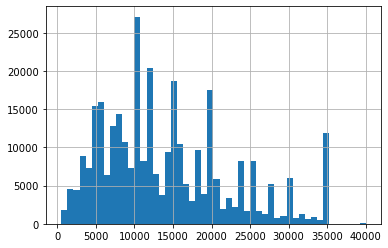

In [832]:
# see if there's an error in conversion
df.loan_amnt.astype(int).hist(bins=50);

In [833]:
# convert
df.loan_amnt = df.loan_amnt.astype(int)

### Term

In [834]:
df.term.value_counts()

 36 months    243903
 60 months     72919
Name: term, dtype: int64

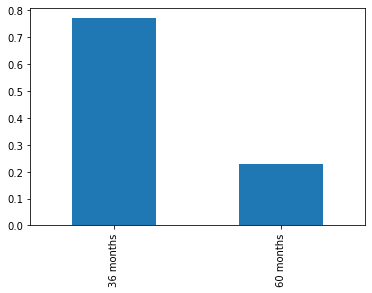

In [835]:
df.term = df.term.str.strip()
df.term.value_counts(normalize=True).plot.bar();

### Interest Rate

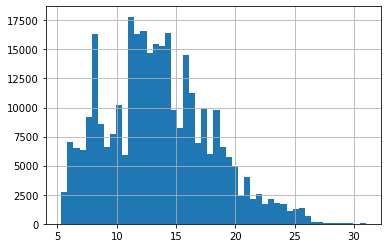

In [836]:
df.int_rate.astype('float').hist(bins=50);

In [837]:
df.int_rate = df.int_rate.astype('float')

### Installment

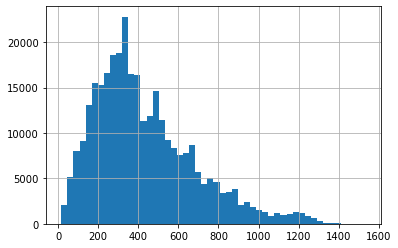

In [838]:
df.installment.astype(float).hist(bins=50);

In [839]:
df.installment = df.installment.astype('float')

### Grade & Sub-grade

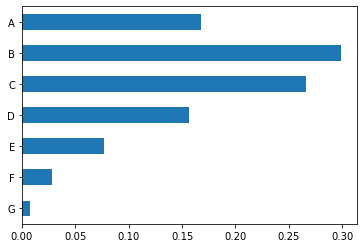

In [840]:
df.grade.value_counts(normalize=True, sort=False).sort_index(ascending=False).plot.barh();

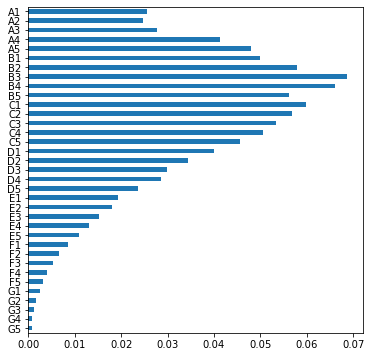

In [841]:
df.sub_grade.value_counts(normalize=True, sort=False).sort_index(ascending=False).plot.barh(figsize=(6,6));

### Employment Title

In [842]:
df.emp_title = df.emp_title.str.strip().str.lower()
df.emp_title.value_counts(normalize=True, dropna=False)*100

                        5.704781
manager                 1.468964
teacher                 1.396368
supervisor              0.701656
registered nurse        0.696290
                          ...   
recreation supt.        0.000316
washfloor               0.000316
legal expert            0.000316
st. clair hospital      0.000316
shubert organization    0.000316
Name: emp_title, Length: 124808, dtype: float64

In [843]:
df.emp_title.nunique()

124808

Too high cardinality, we need an appropriate way to group them, probably, using NLP or Universal Sentence Encoder + K-means to categorize.
But for this test, I'll leave it.

### Employment length

In [844]:
df.emp_length.value_counts()

10+ years    101131
2 years       28732
3 years       25355
< 1 year      25255
5 years       21284
1 year        20676
4 years       19233
6 years       16708
7 years       16544
8 years       15412
              14333
9 years       12159
Name: emp_length, dtype: int64

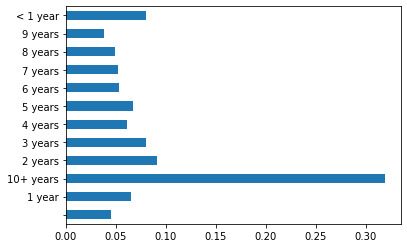

In [845]:
df.emp_length.value_counts(normalize=True).sort_index().plot.barh();

### Home ownership

In [846]:
df.home_ownership.value_counts()

MORTGAGE    159670
RENT        126957
OWN          30077
OTHER           93
NONE            23
ANY              2
Name: home_ownership, dtype: int64

### Annual income

In [847]:
df.annual_inc = df.annual_inc.astype('float')
df.annual_inc.describe()

count    3.168220e+05
mean     7.453170e+04
std      6.289009e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.450000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

### Verification status

In [848]:
df.verification_status.value_counts(normalize=True)

Verified           0.349250
Source Verified    0.330103
Not Verified       0.320647
Name: verification_status, dtype: float64

### Loan status

In [849]:
df.loan_status.value_counts(normalize=True)

Fully Paid     0.84234
Charged Off    0.15766
Name: loan_status, dtype: float64

- Imbalanced
- Will encode 0/1 : Charged Off/Fully Paid later

### Purpose

In [850]:
df.purpose = df.purpose.str.strip().str.lower()
df.purpose.value_counts(normalize=True)*100

debt_consolidation    59.027467
credit_card           21.154781
home_improvement       6.065867
other                  5.339591
major_purchase         2.231853
small_business         1.416253
car                    1.208249
medical                1.058639
moving                 0.709862
vacation               0.619591
house                  0.558358
wedding                0.461458
renewable_energy       0.081118
educational            0.066915
Name: purpose, dtype: float64

### Title

In [851]:
df.title.nunique()

40694

In [852]:
df.title = df.title.str.strip().str.lower()
df.title.nunique()

33496

### DTI (Debt-to-Income)

In [853]:
df.dti = df.dti.astype('float')

In [854]:
df.dti.describe(percentiles=[.25,.75,.95,.99])

count    316822.000000
mean         17.278282
std          19.720789
min           0.000000
25%          11.200000
50%          16.790000
75%          22.850000
95%          31.450000
99%          36.280000
max        9999.000000
Name: dti, dtype: float64

In [855]:
# will have to handle extreme values later
df[df.dti > df.dti.quantile(.9999)].dti.sort_values()

62497       49.25
294         49.38
168180      49.38
179584      49.42
299739      49.55
31950       49.56
19010       50.10
63932       51.20
135782      52.02
307587      52.80
57803       54.90
48102       55.42
208054      55.53
302542      57.14
126565      58.90
44524       59.26
189152      62.70
289732      62.80
43528       63.10
291252      63.98
284940      71.40
58042       77.95
69884       88.21
133032      92.13
216394     107.55
155401     120.66
170082     138.03
58658      145.65
49521      189.90
138862     380.53
297147    1622.00
74807     9999.00
Name: dti, dtype: float64

### Earliest cr line

In [856]:
df.earliest_cr_line

0         Feb-2001
1         Aug-2002
2         Dec-2006
3         Jun-1987
4         Aug-1990
            ...   
316817    Oct-1997
316818    Feb-2003
316819    Aug-1989
316820    May-2007
316821    May-1982
Name: earliest_cr_line, Length: 316822, dtype: object

In [857]:
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line)
df.earliest_cr_line

0        2001-02-01
1        2002-08-01
2        2006-12-01
3        1987-06-01
4        1990-08-01
            ...    
316817   1997-10-01
316818   2003-02-01
316819   1989-08-01
316820   2007-05-01
316821   1982-05-01
Name: earliest_cr_line, Length: 316822, dtype: datetime64[ns]

### open_acc

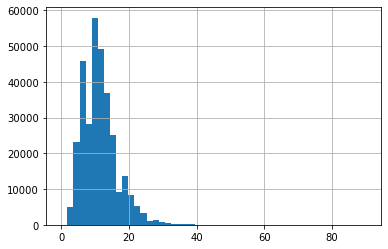

In [858]:
df.open_acc = df.open_acc.astype('int')
df.open_acc.hist(bins=50);

### pub_rec

In [859]:
df.pub_rec = df.pub_rec.astype('int')
df.pub_rec.value_counts()

0     270856
1      39610
2       4349
3       1220
4        403
5        184
6         99
7         42
8         26
9          8
11         8
10         7
13         4
86         1
24         1
40         1
19         1
17         1
12         1
Name: pub_rec, dtype: int64

### revol_bal

In [860]:
df.revol_bal = df.revol_bal.astype('int')

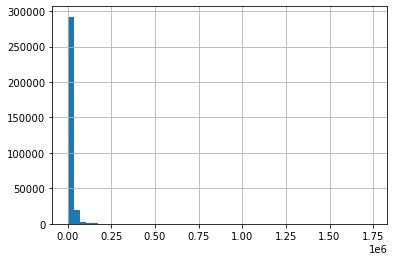

In [861]:
df.revol_bal.hist(bins=50);

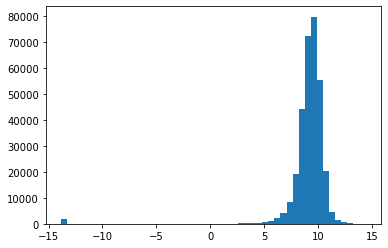

In [862]:
plt.hist(np.log(df.revol_bal+.000001), bins=50)
plt.show()

### revol_util

In [863]:
df.revol_util.str.len().value_counts()

4    301394
3     14183
5      1024
0       221
Name: revol_util, dtype: int64

In [864]:
df.revol_util = df.revol_util.replace({'':np.nan}).astype('float')
df.revol_util.isna().sum()

221

In [865]:
df.revol_util.describe(percentiles=[.25,.75,.9,.99])

count    316601.000000
mean         53.606244
std          24.477154
min           0.000000
25%          35.600000
50%          54.600000
75%          72.700000
90%          86.000000
99%          98.000000
max         892.300000
Name: revol_util, dtype: float64

### total_acc

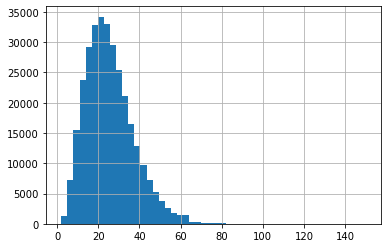

In [866]:
df.total_acc = df.total_acc.astype('int')
df.total_acc.hist(bins=50);

### initial_list

In [867]:
df.initial_list_status.value_counts(normalize=True)*100

f    60.176692
w    39.823308
Name: initial_list_status, dtype: float64

### application_type

In [868]:
df.application_type.value_counts(normalize=True)*100

INDIVIDUAL    99.825770
JOINT          0.106053
DIRECT_PAY     0.068177
Name: application_type, dtype: float64

### mort_acc

In [869]:
df.mort_acc.value_counts()

0.0     110669
1.0      48269
2.0      40006
         30783
3.0      30468
4.0      22474
5.0      14706
6.0       8906
7.0       4953
8.0       2552
9.0       1344
10.0       709
11.0       393
12.0       208
13.0       121
14.0        91
15.0        51
16.0        28
17.0        21
18.0        15
19.0        11
20.0        10
24.0         8
22.0         6
21.0         4
25.0         4
32.0         2
23.0         2
26.0         2
31.0         2
27.0         1
34.0         1
30.0         1
28.0         1
Name: mort_acc, dtype: int64

In [870]:
df.mort_acc = df.mort_acc.replace({'':np.nan}).astype('float')
df.mort_acc.isna().sum()

30783

### pub_rec_backrupticies

In [871]:
df.pub_rec_bankruptcies = df.pub_rec_bankruptcies.replace({'':np.nan}).astype('float')
df.pub_rec_bankruptcies.isna().sum()

433

### Address

In [872]:
df.address

0         257 Smith Circles Apt. 186\r\nWilsonland, NH 1...
1          632 Villanueva View\r\nLawrencechester, NM 00813
2               612 Gillespie Island\r\nDavisside, KY 93700
3                    781 Jessica Trail\r\nRyanton, FL 05113
4                 261 Ashley Knolls\r\nNew Victor, CO 70466
                                ...                        
316817      156 Kimberly Square\r\nGabriellehaven, FL 05113
316818    2675 Ingram Curve Apt. 481\r\nWest Heatherberg...
316819    49145 Vaughn Island Apt. 497\r\nManuelchester,...
316820         0230 Juan Trafficway\r\nShaneburgh, AL 48052
316821     82246 Barnes Run Apt. 473\r\nBakerfort, AR 29597
Name: address, Length: 316822, dtype: object

In [873]:
df.address = df.address.str.replace(r'\s+',' ', regex=True)
df.address

0           257 Smith Circles Apt. 186 Wilsonland, NH 11650
1             632 Villanueva View Lawrencechester, NM 00813
2                  612 Gillespie Island Davisside, KY 93700
3                       781 Jessica Trail Ryanton, FL 05113
4                    261 Ashley Knolls New Victor, CO 70466
                                ...                        
316817         156 Kimberly Square Gabriellehaven, FL 05113
316818    2675 Ingram Curve Apt. 481 West Heatherberg, F...
316819    49145 Vaughn Island Apt. 497 Manuelchester, TN...
316820            0230 Juan Trafficway Shaneburgh, AL 48052
316821        82246 Barnes Run Apt. 473 Bakerfort, AR 29597
Name: address, Length: 316822, dtype: object

## Removing rows

Annual Income should be required for loan application.  
There's only one row with `annual_inc == 0`

In [874]:
df = df[df.annual_inc > 0]

## Save cleansed data

In [875]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316821 entries, 0 to 316821
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    316821 non-null  object        
 1   loan_amnt             316821 non-null  int32         
 2   term                  316821 non-null  object        
 3   int_rate              316821 non-null  float64       
 4   installment           316821 non-null  float64       
 5   grade                 316821 non-null  object        
 6   sub_grade             316821 non-null  object        
 7   emp_title             316821 non-null  object        
 8   emp_length            316821 non-null  object        
 9   home_ownership        316821 non-null  object        
 10  annual_inc            316821 non-null  float64       
 11  verification_status   316821 non-null  object        
 12  loan_status           316821 non-null  object        
 13 

In [876]:
# df.to_parquet('data/01_cleansed.parquet')
df.to_pickle('data/01_cleansed.pkl')